# Lista 03 - ICs + Bootstrap

In [1]:
# -*- coding: utf 8

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import scipy.stats as ss
import pylab as pl

plt.style.use('seaborn-colorblind')
plt.ion()

# Exercício 01:
Vamos utilizar a base de dados de recém-nascidos disponibilizada no exercício.

In [2]:
df = pd.read_csv('baby.csv')

# Convertendo para unidades não EUA
df['Birth Weight'] = 0.0283495 * df['Birth Weight']
df['Maternal Pregnancy Weight'] = 0.0283495 * df['Maternal Pregnancy Weight']
df['Maternal Height'] = 0.0254 * df['Maternal Height']

df.describe()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,3.386703,279.101363,27.228279,1.626855,3.642307
std,0.519609,16.010305,5.817839,0.064163,0.587807
min,1.559222,148.000000,15.000000,1.346200,2.466407
25%,3.061746,272.000000,23.000000,1.574800,3.238930
50%,3.401940,280.000000,26.000000,1.625600,3.543687
75%,3.713785,288.000000,31.000000,1.676400,3.940580
max,4.989512,353.000000,45.000000,1.828800,7.087375


A) Plote uma PDF dos dados da coluna "Gestational Days".

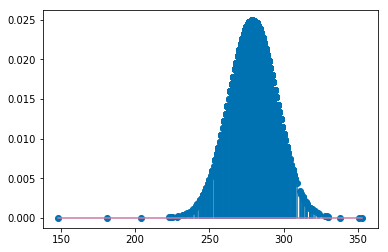

NotImplementedError: 

In [3]:
# YOUR CODE HERE
mean = np.mean(df['Gestational Days'])
var = np.var(df['Gestational Days'])
std = np.sqrt(var)

pdf = ss.norm.pdf(x=df['Gestational Days'],loc=mean,scale=std)

#plt.plot(df['Gestational Days'],ss.norm.pdf(df['Gestational Days']))
plt.stem(df['Gestational Days'],pdf,label='PDF')
plt.show()
raise NotImplementedError()

B) Para o número de dias de gestação, determine com 95% de o Intervalo de Confiança. Não utilize a técnica de bootstrap.

Retorne uma lista com os valores inferior e superior do intervalo de confiança.
Exemplo:
```python
return [inferior,superior]
```

In [5]:
def calcula_IC_gestacao(df):
    # YOUR CODE HERE
    confidence = 0.95
    vec = 1.0 * np.array(df['Gestational Days'])
    tam = len(vec)
    mean, se = np.mean(vec), ss.sem(vec)
    h = se * ss.t.ppf((1+confidence) / 2., tam-1)
    return [mean-h, mean+h]
    raise NotImplementedError()

In [6]:
calcula_IC_gestacao(df)

[278.18458946317185, 280.01813626084856]

C) Na função abaixo, retorne o número da opção que melhor define o que indica o Intervalo de Confiança:

    1: A média da amostra está com 95% de probabilidade dentro do intervalo
    2: 95% dos valores da população estão dentro do intervalo
    3: O intervalo inclui a média da população com 95% de probabilidade
    4: 5% da amostra está a mais que 1.96 de distância da média da população
    5: Nenhuma das anteriores

In [4]:
def resposta():
    # YOUR CODE HERE
    return 3
    raise NotImplementedError()

In [7]:
resposta()

3

# Exercício 02:

Agora vamos calcular intervalos de confiança utilizando bootstrap.

A) Para a coluna "Maternal Age", plote um histograma dos valores.

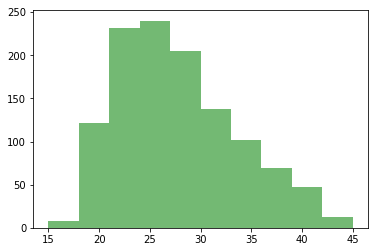

NotImplementedError: 

In [8]:
# YOUR CODE HERE
plt.hist(df['Maternal Age'],color='green',alpha=0.55)
plt.show()
raise NotImplementedError()

B) Utilizando o mesmo atributo, execute um bootstrap com 5000 amostras e plote a distribuição das medianas.

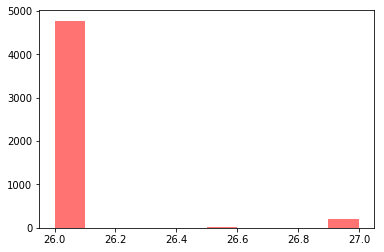

NotImplementedError: 

In [9]:
# YOUR CODE HERE
size = 5000
values = np.zeros(size)
for i in range(size):
    sample = df['Maternal Age'].sample(size,replace=True)
    values[i] = sample.median()

plt.hist(values,color='red',alpha=0.55)
plt.show()
raise NotImplementedError()

# Exercício 03:

Plote, em escala log-log, a distribuição dos dados no arquivo "lista.csv".

In [13]:
dados = pd.read_csv('lista.csv')['valores']

A) Calcule a média, mediana, variância, e desvio padrão. Retorne em uma lista da seguinte forma:
```python
return [media,mediana,var,desvio]
```

In [14]:
def ex3(dados):
    media = np.mean(dados)
    median = np.median(dados)
    var = np.var(dados)
    std = np.sqrt(var)
    return [media, median, var, std]
    # YOUR CODE HERE
    raise NotImplementedError()

In [15]:
ex3(dados)

[19.508920875736013,
 1.0042548724785347,
 3257557.3210686147,
 1804.8704443999893]

B) Calcule o intervalo de confiança, com confiança de 95%. Retorne em uma lista da seguinte forma:
```python
return [inferior,superior]
```

In [16]:
def ex3_IC(dados):
    # YOUR CODE HERE
    # YOUR CODE HERE
    confidence = 0.95
    vec = 1.0 * np.array(dados)
    tam = len(vec)
    mean, stdErr = np.mean(vec), ss.sem(vec)
    h = stdErr * ss.t.ppf((1+confidence) / 2., tam-1)
    return [mean-h, mean+h]
    raise NotImplementedError()

In [17]:
ex3_IC(dados)

[8.322232187847705, 30.69560956362426]

C) Plote a distribuição dos valores dos dados, em escala log-log. 

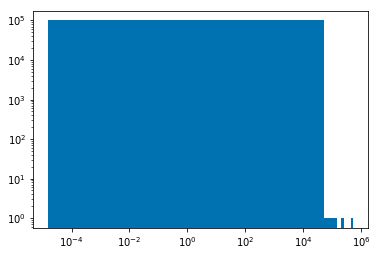

In [19]:
# YOUR CODE HERE
plt.hist(dados,log=True)
plt.xscale('log')
plt.show()

D) Tente explicar o por quê de os valores calculados ficaram tão elevados.

YOUR ANSWER HERE

Pois no conjunto de dados há uma variância e discrepancia muito elevada dos valores.